## Introducción a los futuros perpetuos

### 1) Carga de librerías necesarias

In [26]:
import ccxt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 2) Parámetros de entrada

In [27]:
# -------------- INPUTS -------------- #

start_date = '2023-03-01'
end_date = '2023-08-31'

# --------------  END   -------------- #

### 3) Carga de datos

In [28]:
# Conexión con la API de Binance
exchange = ccxt.binance()

# Símbolo para el spot Bitcoin
symbol = 'BTC/USDT'

# Datos de cada día
timeframe = '1d'

# Obtenemos los datos del spot y perpetuo
spot_data = exchange.fetch_ohlcv(symbol, timeframe)
futures_symbol = symbol.replace('/', '').replace('USDT','USD_PERP')
futures_data = exchange.fetch_ohlcv(futures_symbol, timeframe)

### 4) Transformación de los datos

In [29]:
# Pasamos los datos a uno dataframes
spot_df = pd.DataFrame(spot_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
futures_df = pd.DataFrame(futures_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Convertimos las fechas a un formato más legible
spot_df['timestamp'] = pd.to_datetime(spot_df['timestamp'], unit='ms')
futures_df['timestamp'] = pd.to_datetime(futures_df['timestamp'], unit='ms')

# Filtramos los datos entre dos fechas
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)
spot_df = spot_df[(spot_df['timestamp'] >= start_date) & (spot_df['timestamp'] <= end_date)]
futures_df = futures_df[(futures_df['timestamp'] >= start_date) & (futures_df['timestamp'] <= end_date)]

# Nos aseguramos de que ambos tengan los mismos puntos
spot_df = spot_df[spot_df['timestamp'].isin(futures_df['timestamp'])]
futures_df = futures_df[futures_df['timestamp'].isin(spot_df['timestamp'])]

### 5) Mostrar las figuras relevantes

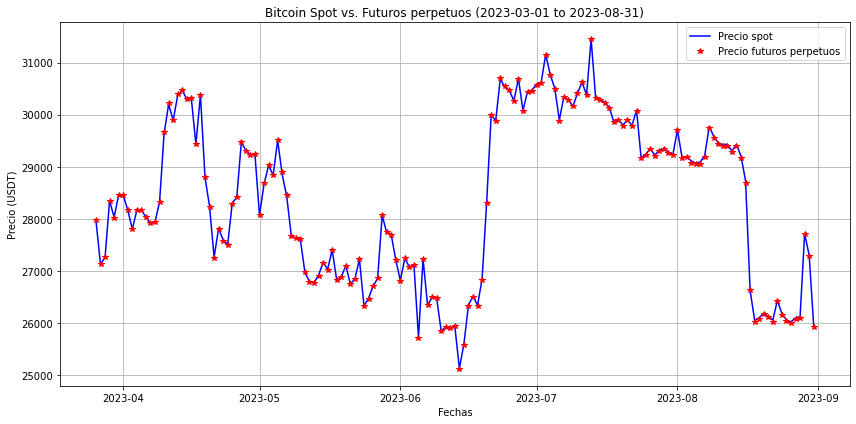

In [30]:
# Plot de las series temporales
plt.figure(figsize=(12, 6))
plt.plot(spot_df['timestamp'].values, spot_df['close'].values, label='Precio spot', color='blue')
plt.plot(futures_df['timestamp'].values, futures_df['close'].values, label='Precio futuros perpetuos', color='red', marker='*',linestyle = 'None')
plt.xlabel('Fechas')
plt.ylabel('Precio (USDT)')
plt.title(f'Bitcoin Spot vs. Futuros perpetuos ({start_date.date()} to {end_date.date()})')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('btc_perpetual.png', format = 'png', dpi = 250)
plt.show()


No handles with labels found to put in legend.


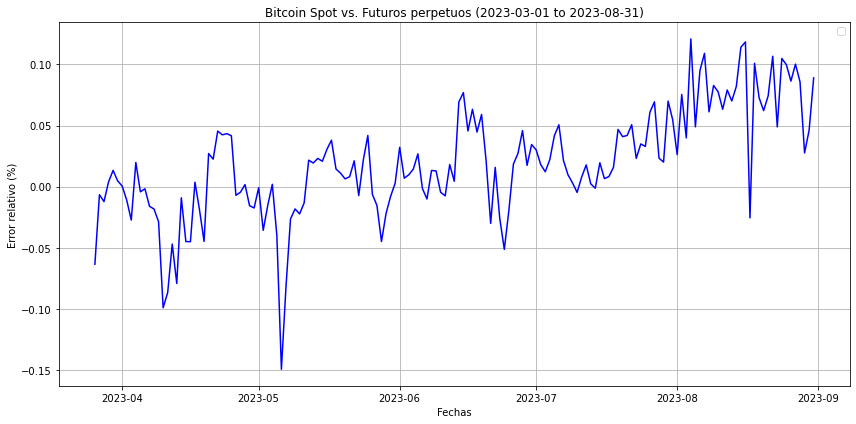

In [31]:
# Plot del error relativo entre spot y perpetuo
plt.figure(figsize=(12, 6))
plt.plot(spot_df['timestamp'].values, 100*(spot_df['close'].values - futures_df['close'].values)/spot_df['close'].values, color='blue')
plt.xlabel('Fechas')
plt.ylabel('Error relativo (%)')
plt.title(f'Bitcoin Spot vs. Futuros perpetuos ({start_date.date()} to {end_date.date()})')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('btc_perpetual_error.png', format = 'png', dpi = 250)
plt.show()